In [1]:
import pandas_datareader as pdr
from pandas_datareader import wb

## Download the Data

In [2]:
indicators = {
    "NY.GDP.PCAP.CD": "GDP per capita",
    "FP.CPI.TOTL.ZG": "Inflation rate",
    "NV.IND.TOTL.ZS": "Industry (% GDP)",
    "NE.EXP.GNFS.ZS": "Exports (% GDP)",
    "SL.UEM.TOTL.ZS": "Unemployment rate",
    "IT.NET.USER.ZS": "Internet Usage (% population)"
}

# Download country data from World Bank from 2000 to 2023
data = wb.download(indicator=indicators, country="all", start=2000, end=2023)

data.reset_index(inplace=True)
data.rename(columns=indicators, inplace=True)

data.head()

/var/folders/n8/s5gn3hhs4z90dmrnk47r93fh0000gn/T/ipykernel_6958/3554235175.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = wb.download(indicator=indicators, country="all", start=2000, end=2023)


,country,year,GDP per capita,Inflation rate,Industry (% GDP),Exports (% GDP),Unemployment rate,Internet Usage (% population)
0,Afghanistan,2000,174.930991,NaN,NaN,NaN,11.517,NaN
1,Afghanistan,2001,138.706822,NaN,NaN,NaN,11.513,0.00472
2,Afghanistan,2002,178.954088,NaN,23.810127,NaN,11.596,0.00456
3,Afghanistan,2003,198.871116,NaN,22.710864,NaN,11.604,0.08790
4,Afghanistan,2004,221.763654,NaN,26.226790,NaN,11.528,0.10600


In [3]:
data.describe()

,GDP per capita,Inflation rate,Industry (% GDP),Exports (% GDP),Unemployment rate,Internet Usage (% population)
count,6179.000000,5461.000000,5768.000000,5340.000000,4225.000000,4800.000000
mean,14639.049152,6.146233,26.709493,40.070617,7.808953,38.791239
std,23088.115122,17.709686,11.839785,29.567084,5.709291,31.710451
min,109.593814,-16.859691,2.390762,1.108109,0.091000,0.000000
25%,1536.482685,1.881108,19.319354,23.082135,3.983000,7.600000
50%,5002.657987,3.641273,25.266655,31.973260,6.177000,32.850000
75%,18357.221667,6.575900,31.972094,49.322615,10.168000,68.200000
max,256580.515123,557.201817,86.669555,433.836004,37.250000,100.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        6600 non-null   object 
 1   year                           6600 non-null   object 
 2   GDP per capita                 6179 non-null   float64
 3   Inflation rate                 5461 non-null   float64
 4   Industry (% GDP)               5768 non-null   float64
 5   Exports (% GDP)                5340 non-null   float64
 6   Unemployment rate              4225 non-null   float64
 7   Internet Usage (% population)  4800 non-null   float64
dtypes: float64(6), object(2)
memory usage: 412.6+ KB


In [5]:
missing_values = data.isnull().sum() / len(data) * 100
missing_values.sort_values(ascending=False)


Unemployment rate                35.984848
Internet Usage (% population)    27.272727
Exports (% GDP)                  19.090909
Inflation rate                   17.257576
Industry (% GDP)                 12.606061
GDP per capita                    6.378788
country                           0.000000
year                              0.000000
dtype: float64

In [6]:
data.shape

(6600, 8)

## Clean the Data

In [7]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

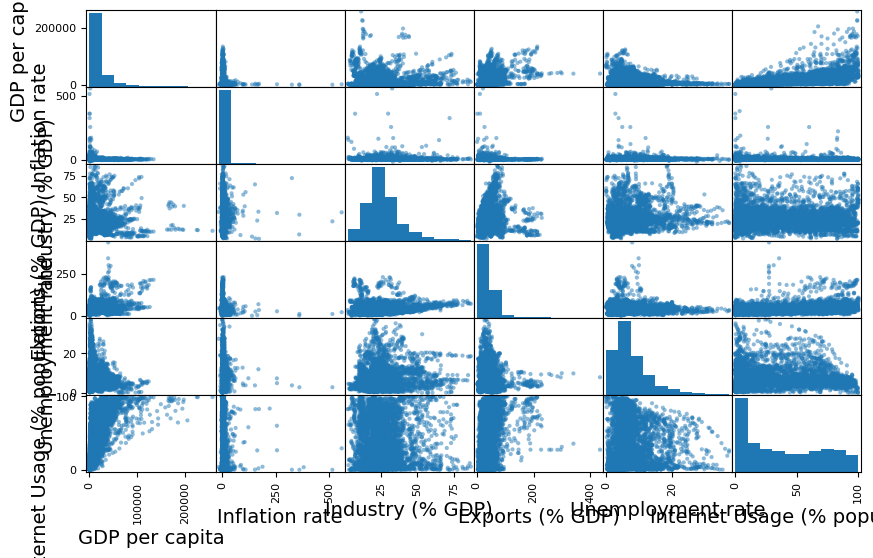

In [8]:
from pandas.plotting import scatter_matrix

numerical_columns = data.select_dtypes(include=['int64', 'float']).columns
scatter_matrix_fig = scatter_matrix(data[numerical_columns], figsize=(10, 6))

plt.show()

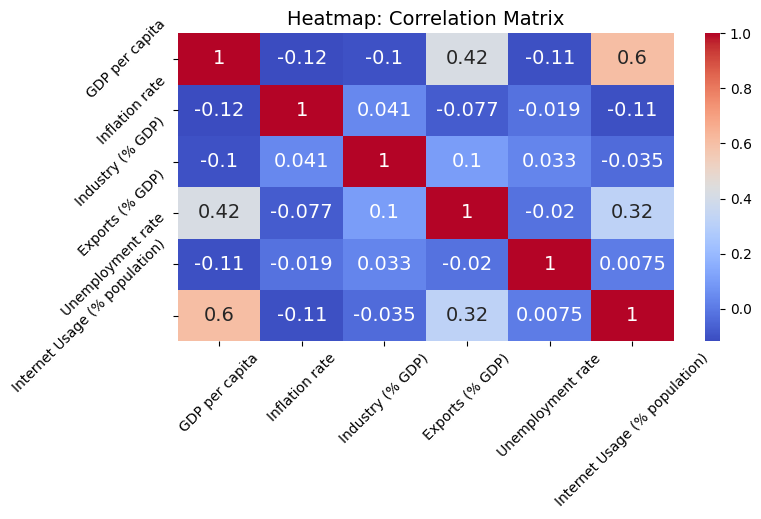

In [9]:
import seaborn as sns

correlation_matrix = data[numerical_columns].corr()

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Matrix')

plt.xticks(rotation=45)  
plt.yticks(rotation=45)

plt.show()

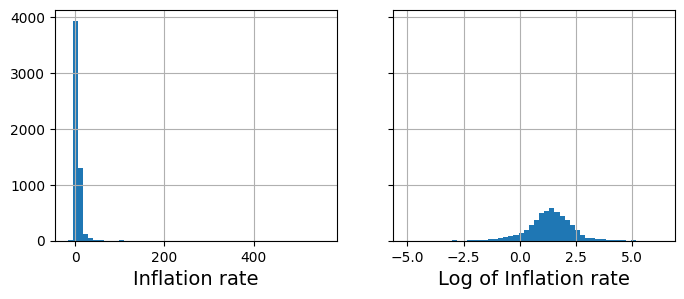

In [10]:
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data["Inflation rate"].hist(ax=axs[0], bins=50)
data["Inflation rate"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Inflation rate")
axs[1].set_xlabel("Log of Inflation rate")

plt.show()

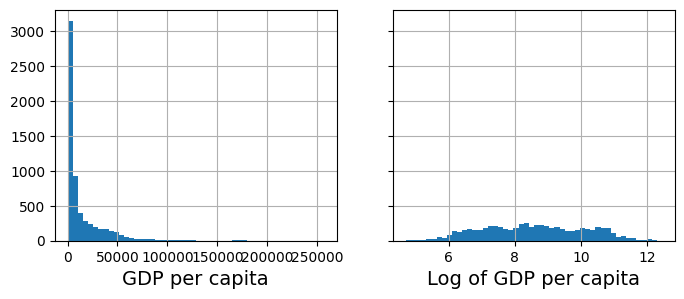

In [11]:
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data["GDP per capita"].hist(ax=axs[0], bins=50)
data["GDP per capita"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("GDP per capita")
axs[1].set_xlabel("Log of GDP per capita")

plt.show()

In [12]:
nan_counts = data.isna().groupby(data["country"]).sum()  
nan_counts["total_NaN"] = nan_counts.sum(axis=1)  
nan_counts = nan_counts.sort_values("total_NaN", ascending=False)  

In [13]:
nan_counts[nan_counts["total_NaN"] > 30]

,country,year,GDP per capita,Inflation rate,Industry (% GDP),Exports (% GDP),Unemployment rate,Internet Usage (% population),total_NaN
country,,,,,,,,,
Cook Islands,0,0,24,24,24,24,24,24,144
Montserrat,0,0,24,24,24,24,24,24,144
Not classified,0,0,24,24,24,24,24,24,144
Niue,0,0,24,24,24,24,24,24,144
Tokelau,0,0,24,24,24,24,24,24,144
...,...,...,...,...,...,...,...,...,...
Eswatini,0,0,0,4,0,24,4,0,32
Liberia,0,0,0,2,0,24,4,2,32
Barbados,0,0,0,3,0,24,4,0,31


In [14]:
countries_to_drop = nan_counts[nan_counts["total_NaN"] > 30].index
data = data[~data["country"].isin(countries_to_drop)]
data.reset_index(drop=True, inplace=True)


In [15]:
import pycountry

countries = {country.name for country in pycountry.countries}

countries_filtered = [country for country in data["country"].unique() if country in countries]


In [16]:
data = data[data["country"].isin(countries_filtered)]
data.reset_index(drop=True, inplace=True)

In [17]:
len(data["country"].unique())

148

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   country                        3552 non-null   object 
 1   year                           3552 non-null   object 
 2   GDP per capita                 3548 non-null   float64
 3   Inflation rate                 3394 non-null   float64
 4   Industry (% GDP)               3456 non-null   float64
 5   Exports (% GDP)                3361 non-null   float64
 6   Unemployment rate              2940 non-null   float64
 7   Internet Usage (% population)  3465 non-null   float64
dtypes: float64(6), object(2)
memory usage: 222.1+ KB


In [19]:
from sklearn.preprocessing import OrdinalEncoder

unique_years = sorted(data["year"].unique())
ordinal_encoder = OrdinalEncoder(categories=[unique_years])

In [20]:
from sklearn.impute import KNNImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

def digital_economy_index(X):
    return (X[:, [0]] * 0.5) + (X[:, [1]] * 0.3) + (X[:, [2]] * 0.2)  

def name(function_transformer, feature_names_in):
    return ["index"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        KNNImputer(n_neighbors=5, weights="distance"),
        FunctionTransformer(digital_economy_index, feature_names_out=name),
        StandardScaler())

log_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5, weights="distance"),
    FunctionTransformer(lambda x: np.log1p(np.maximum(x, 0)), feature_names_out="one-to-one"),
    StandardScaler()
)

ord_pipeline = make_pipeline(ordinal_encoder) 

preprocessing = ColumnTransformer([
        ("digital_economy", ratio_pipeline(), ["GDP per capita", "Internet Usage (% population)", 
                                               "Exports (% GDP)"]),
        ("log", log_pipeline, ['GDP per capita', 'Inflation rate', 
                               'Industry (% GDP)', 'Exports (% GDP)', 'Unemployment rate',
                               'Internet Usage (% population)']),
        ("ord", ord_pipeline, ['year']),
    ],
    remainder="passthrough") 

In [57]:
preprocessed = preprocessing.fit_transform(data)

In [58]:
preprocessed.shape

(3552, 9)

In [59]:
import pandas as pd

feature_names = preprocessing.get_feature_names_out()

df = pd.DataFrame(preprocessed, columns=feature_names)

df.tail()

,digital_economy__index,log__GDP per capita,log__Inflation rate,log__Industry (% GDP),log__Exports (% GDP),log__Unemployment rate,log__Internet Usage (% population),ord__year,remainder__country
3547,-0.610856,-0.704833,4.494871,0.55638,-0.326352,-0.315321,0.153755,19.0,Zimbabwe
3548,-0.608531,-0.68716,5.37362,0.612175,-0.656642,1.179017,0.224472,20.0,Zimbabwe
3549,-0.60859,-0.689429,3.427135,0.29859,-0.623411,0.674966,0.398035,21.0,Zimbabwe
3550,-0.592446,-0.579926,3.494911,1.080841,-0.308388,1.674267,0.413779,22.0,Zimbabwe
3551,-0.586708,-0.544116,0.8382,0.078055,-0.707111,-0.509703,0.423456,23.0,Zimbabwe


## K-Means

In [65]:
wb = df[df['ord__year'] == 23].copy()
wb.reset_index(drop=True, inplace=True)
wb.head()

,digital_economy__index,log__GDP per capita,log__Inflation rate,log__Industry (% GDP),log__Exports (% GDP),log__Unemployment rate,log__Internet Usage (% population),ord__year,remainder__country
0,-0.259825,0.354154,0.209834,-0.243819,0.206709,0.553872,0.99797,23.0,Albania
1,-0.422987,0.048872,0.868483,0.95845,-0.566815,1.034311,0.939946,23.0,Algeria
2,-0.578417,-0.499764,1.263338,1.403257,0.293938,-0.227661,0.537503,23.0,Angola
3,0.024141,0.681795,2.062579,-0.039191,-1.51165,1.074813,1.051026,23.0,Argentina
4,-0.28595,0.313272,-0.533979,-0.206844,0.890136,1.009969,0.969513,23.0,Armenia


In [66]:
wb_macro = wb.drop(columns="remainder__country")

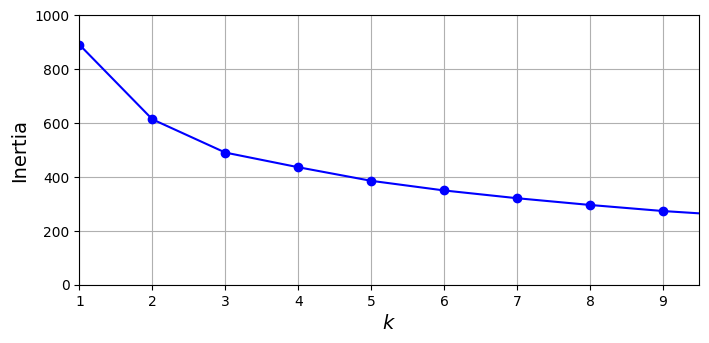

In [68]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, n_init=30, random_state=42).fit(wb_macro)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 9.5, 0, 1000])
plt.grid()
plt.show()

In [69]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 6)  # Evaluate from 1 to 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = kmeans.fit_predict(wb_macro)
    score = silhouette_score(wb_macro, labels)
    silhouette_scores.append(score)

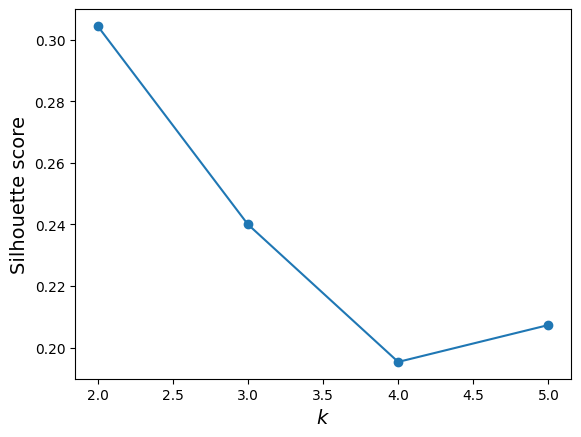

In [70]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=3, n_init=30, random_state=42)
labels = kmeans.fit_predict(wb_macro)

In [127]:
wb_macro_pca = wb.copy()
wb_macro_pca["cluster"] = labels

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wb_macro_pca[['PC1', 'PC2']] = pca.fit_transform(X = wb_macro.drop(columns="ord__year"))

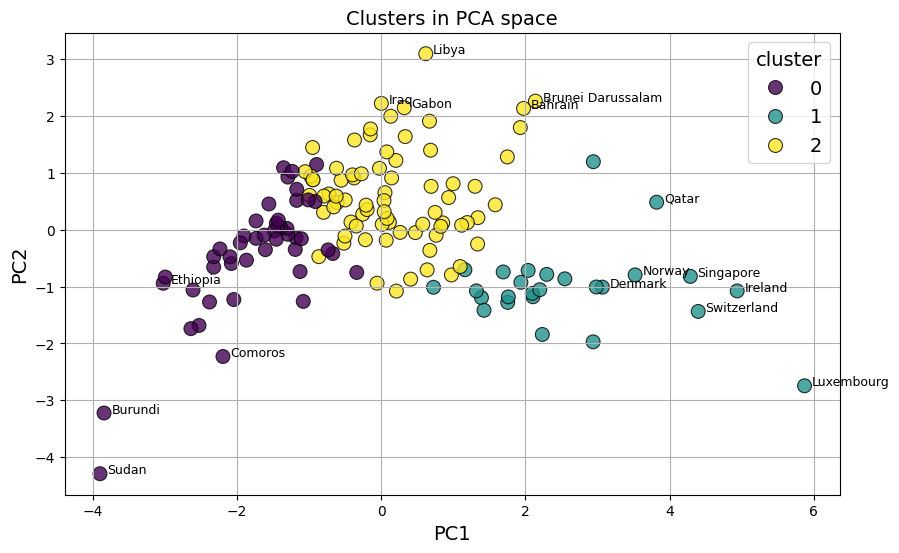

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb_macro_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')


for _, row in wb_macro_pca.iterrows():
    if abs(row['PC1']) > 3 or abs(row['PC2']) > 2:
        plt.text(row['PC1'] + 0.1, row['PC2'], row['remainder__country'], fontsize=9)
    
plt.title("Clusters in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## DBSCAN

In [102]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1, min_samples=5)
labels = dbscan.fit_predict(wb_macro)

In [103]:
len(set(labels))

3

In [104]:
db_macro = wb.copy()
db_macro["cluster"] = labels

In [105]:
db_macro["cluster"].value_counts()

cluster
-1    74
 0    61
 1    13
Name: count, dtype: int64

## Gaussian Mixtures

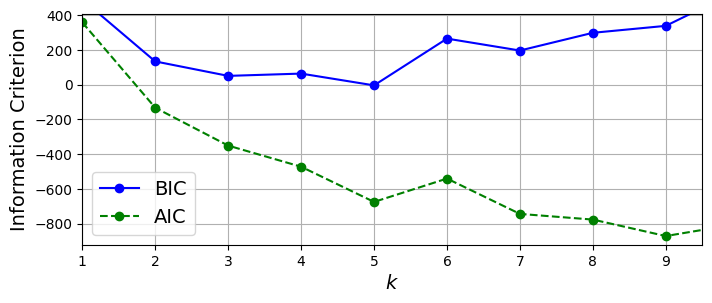

In [106]:
from sklearn.mixture import GaussianMixture

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(wb_macro)
             for k in range(1, 11)]
bics = [model.bic(wb_macro) for model in gms_per_k]
aics = [model.aic(wb_macro) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

In [109]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=20, random_state=42)
bgm.fit(wb_macro)
bgm.weights_.round(2)

array([0.08, 0.19, 0.02, 0.04, 0.3 , 0.31, 0.05, 0.  , 0.  , 0.  ])

In [110]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(wb_macro)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [111]:
gm.converged_

True

In [112]:
gm.weights_ 

array([0.28101722, 0.22860793, 0.49037485])

In [129]:
wb_macro_pca["cluster_gm"] = gm.predict(wb_macro)

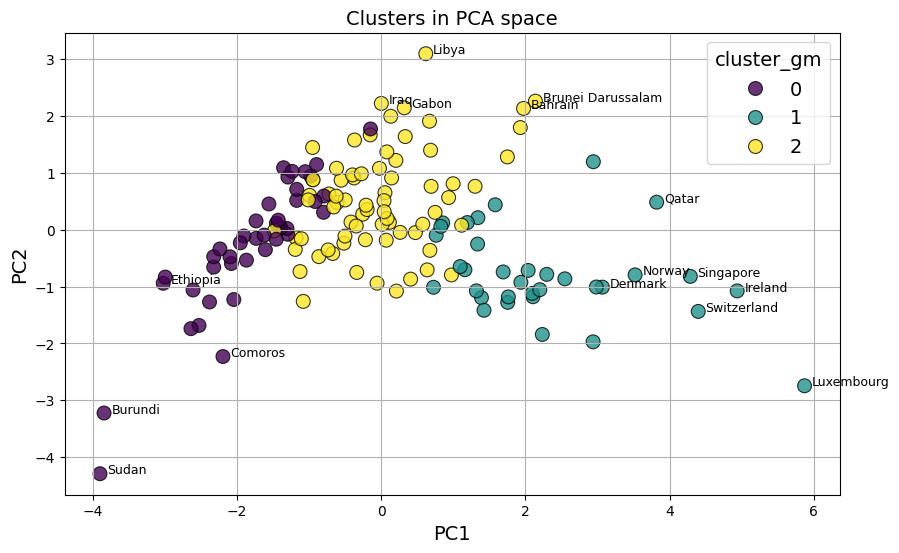

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb_macro_pca, x='PC1', y='PC2', hue='cluster_gm', palette='viridis', s=100, alpha=0.8, edgecolor='black')


for _, row in wb_macro_pca.iterrows():
    if abs(row['PC1']) > 3 or abs(row['PC2']) > 2:
        plt.text(row['PC1'] + 0.1, row['PC2'], row['remainder__country'], fontsize=9)
    
plt.title("Clusters in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

## Simplifying the Data

In [136]:
df_s = wb.copy()

In [137]:
selected_countries = {
    "United States": "North America",
    "Canada": "North America",
    "Mexico": "North America",
    "Brazil": "South America",
    "Argentina": "South America",
    
    "Germany": "Europe",
    "France": "Europe",
    "Italy": "Europe",
    "Poland": "Europe",
    "Albania": "Europe",
    
    "China": "Asia",
    "India": "Asia",
    "Japan": "Asia",
    "Indonesia": "Asia",
    "Malaysia": "Asia",
    
    "Nigeria": "Africa",
    "South Africa": "Africa",
    "Kenya": "Africa",
    
    "Australia": "Oceania",
    "New Zealand": "Oceania"
}


In [138]:
df_s["continent"] = df_s["remainder__country"].map(selected_countries)
df_s = df_s[df_s["remainder__country"].isin(selected_countries.keys())]

In [139]:
df_s['remainder__country'].unique()

array(['Albania', 'Argentina', 'Australia', 'Brazil', 'Canada', 'China',
       'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan',
       'Kenya', 'Malaysia', 'Mexico', 'New Zealand', 'Nigeria', 'Poland',
       'South Africa', 'United States'], dtype=object)

In [141]:
df_s.reset_index(drop=True, inplace=True)

## K-Means

In [142]:
wb_macro = df_s.copy()

In [143]:
wb_macro = wb_macro.drop(columns=["remainder__country", "continent", "ord__year"])

In [144]:
wb_macro.head()

,digital_economy__index,log__GDP per capita,log__Inflation rate,log__Industry (% GDP),log__Exports (% GDP),log__Unemployment rate,log__Internet Usage (% population)
0,-0.259825,0.354154,0.209834,-0.243819,0.206709,0.553872,0.99797
1,0.024141,0.681795,2.062579,-0.039191,-1.51165,1.074813,1.051026
2,2.589632,1.670501,0.363061,0.199312,-0.369808,-0.325653,1.114641
3,-0.173093,0.473091,0.176777,-0.324101,-0.977659,0.085409,1.007816
4,2.012695,1.544746,0.022472,-0.762301,-0.025718,0.106213,1.090311


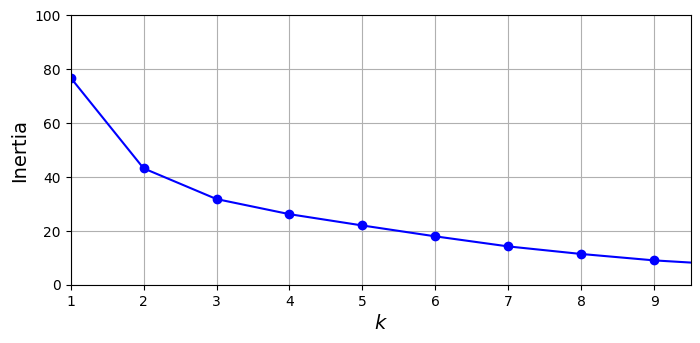

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_per_k = [KMeans(n_clusters=k, n_init=30, random_state=42).fit(wb_macro)
                for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 11), inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.axis([1, 9.5, 0, 100])
plt.grid()
plt.show()

In [147]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 6)  # Evaluate from 1 to 5 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
    labels = kmeans.fit_predict(wb_macro)
    score = silhouette_score(wb_macro, labels)
    silhouette_scores.append(score)

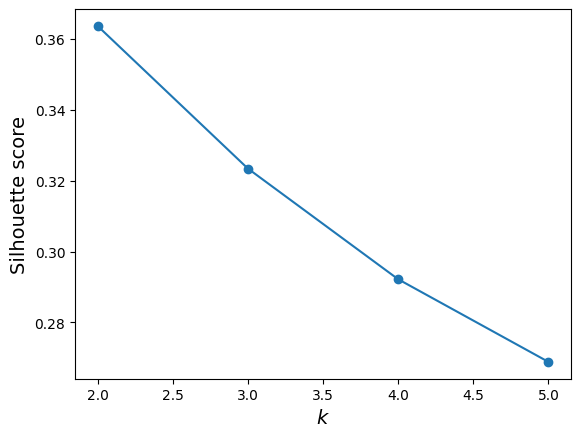

In [148]:
import matplotlib.pyplot as plt

plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('$k$')
plt.ylabel('Silhouette score')
plt.show()

In [154]:
kmeans = KMeans(n_clusters=3, n_init=30, random_state=42)
labels = kmeans.fit_predict(wb_macro)

In [155]:
wb_macro_pca = wb_macro.copy()
wb_macro_pca["cluster"] = labels

In [156]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
wb_macro_pca[['PC1', 'PC2']] = pca.fit_transform(X = wb_macro)

In [157]:
wb_macro_pca['country'] = df_s['remainder__country']

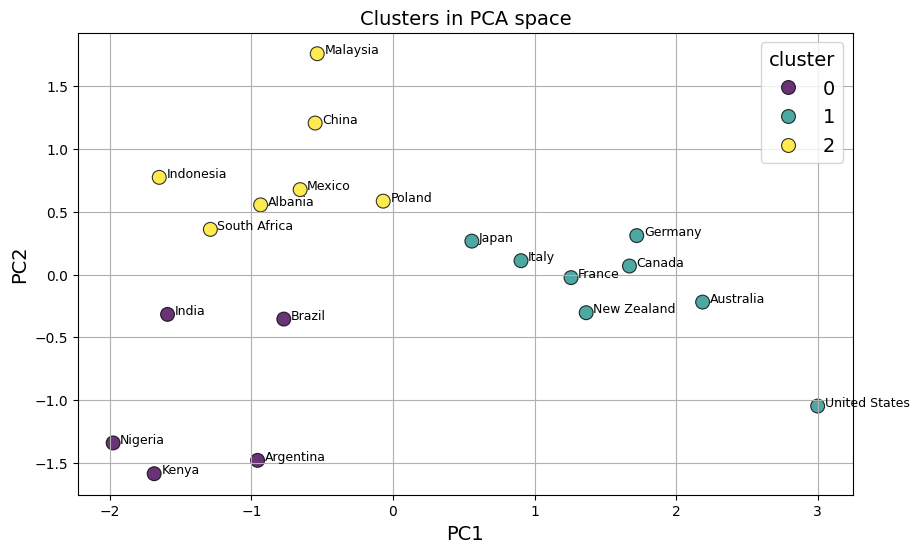

In [158]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb_macro_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', s=100, alpha=0.8, edgecolor='black')


for _, row in wb_macro_pca.iterrows():
    plt.text(
        row['PC1'] + 0.05, 
        row['PC2'],
        row['country'], 
        fontsize=9
    )
    
plt.title("Clusters in PCA space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()